In [64]:
import numpy as np
import pandas as pd
import scipy.stats as ss

In [84]:
df_main=pd.read_csv('dataset/MainTable.csv' )
df_pred=pd.read_csv('dataset/Predict.csv' )

In [85]:
df_data = df_pred.loc[:,['SubjectID','ProblemID','FirstCorrect','EverCorrect']]
print (df_data.head(5))

  SubjectID         ProblemID  FirstCorrect  EverCorrect
0      S002    nearestBusStop          True         True
1      S002  backwardsCombine          True         True
2      S002      firstAndLast         False         True
3      S002    singlePigLatin         False         True
4      S002      hasTwoDigits         False         True


In [67]:
prob={'helloWorld':1, 'doubleX': 2,'raiseToPower': 3, 'convertToDegrees': 4, 'findRoot': 5, 'intToFloat': 6,
    'leftoverCandy': 7, 'howManyEggCartons': 8, 'kthDigit':9, 'nearestBusStop':10, 'isPunctuation':11, 
    'overNineThousand':12, 'hasTwoDigits' :13, 'canDrinkAlcohol':14, 'isEvenPositiveInt':15, 
    'backwardsCombine': 16, 'carefulSquareRoot': 17, 'firstAndLast': 18, 'oneToN':19, 'castString' :20,
    'stockChange': 21, 'singlePigLatin' :22, 'sumOfDigits': 23,'isPrime': 24, 'createNumberBlock': 25,
    'isSubstring': 26, 'anyLowercase':27, 'middleElement': 28, 'secondHalf':29, 'reduceToPositive':30,
    'factorial':31, 'fibonacci': 32,'friendOfFriends': 33, 'gcd':34, 'treasureHunt':35,  'mostAnagrams': 36,
    'findTheCircle':37, 'listOfLists': 38        
}
    

In [68]:
df_data.ProblemID= [prob[item] for item in df_data.ProblemID] 
df_main.ProblemID= [prob[item] for item in df_main.ProblemID] 
df_data = df_data.astype({"ProblemID": int})
df_main = df_main.astype({"ProblemID": int})

In [69]:
time=[]
import datetime
from datetime import timedelta
datetimeFormat = '%Y-%m-%dT%H:%M:%S'
for x,y in zip(df_data['SubjectID'],df_data['ProblemID']):
    tstamp=df_main.loc[(df_main['SubjectID'] == x) & (df_main['ProblemID']==y),'ServerTimestamp']
    c=0
    n=len(tstamp)
    everC=df_data.loc[(df_data['SubjectID'] == x) & (df_data['ProblemID']==y),'EverCorrect']
    if everC.iloc[0] == False:
        time.append(110)
        continue
             
    for i in range(n-1):
        diff=datetime.datetime.strptime(tstamp.iloc[i+1], datetimeFormat) -datetime.datetime.strptime(tstamp.iloc[i], datetimeFormat)
               
        if diff.days==0 and diff.seconds<=3600:
            c+=diff.seconds 
      
    time.append(c/60)

df_data['time']=time
print (df_data.head(5))


  SubjectID  ProblemID  FirstCorrect  EverCorrect  time
0      S002         10          True         True   0.0
1      S002         16          True         True   0.0
2      S002         18         False         True  16.0
3      S002         22         False         True   5.0
4      S002         13         False         True   0.0


In [70]:
prob_list = df_data['ProblemID'].unique()

df_data['norm']=np.NaN
for p in prob_list:
    temp=[]
    sub=df_data.loc[df_data['ProblemID'] == p,['SubjectID','time']]
    amin, amax = min(sub['time']), max(sub['time'])
    for x,y in zip(sub['SubjectID'],sub['time']):
        norm_t=(y-amin) / (amax-amin)
        df_data.loc[(df_data['ProblemID'] == p) & (df_data['SubjectID'] == x), 'norm'] = norm_t


#print (df_data.head(25))

In [71]:
prob_list = df_data['ProblemID'].unique()

for p in prob_list:
    sub=df_data.loc[df_data['ProblemID'] == p]
    r=sub.norm.rank(method='min')
    amin, amax = min(r), max(r)
    for x,y in zip(sub['SubjectID'],r):
        norm_t=(y-amin) / (amax-amin)
        df_data.loc[(df_data['ProblemID'] == p) & (df_data['SubjectID'] == x), 'norm'] = norm_t
    
print (df_data.head(25))        

   SubjectID  ProblemID  FirstCorrect  EverCorrect   time      norm
0       S002         10          True         True    0.0  0.000000
1       S002         16          True         True    0.0  0.000000
2       S002         18         False         True   16.0  0.850000
3       S002         22         False         True    5.0  0.722222
4       S002         13         False         True    0.0  0.000000
5       S002         15         False         True   15.0  0.875000
6       S011          1         False         True    1.0  0.656716
7       S011          2          True         True    0.0  0.000000
8       S011          3          True         True    0.0  0.000000
9       S011          4          True         True    0.0  0.000000
10      S011         11         False        False  110.0  1.000000
11      S011          5         False        False  110.0  1.000000
12      S011          7          True         True    0.0  0.000000
13      S011          6          True         Tr

SubjectID       171
ProblemID       171
FirstCorrect    171
EverCorrect     171
time            171
norm            171
dtype: int64


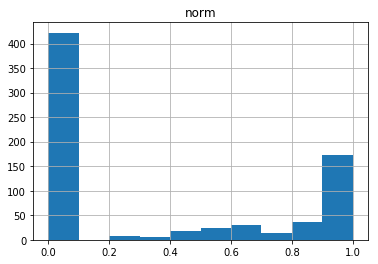

In [72]:
from matplotlib.pyplot import hist
#temp=df_data.loc[df_data['ProblemID'] == 1]
df_data.hist(column='norm')
temp = df_data[(df_data['norm'] >0) & (df_data['norm'] < 1)]
print (temp.count())

In [73]:
s=set()

datetimeFormat = '%Y-%m-%dT%H:%M:%S'

df_copy=df_main.drop_duplicates(subset=['SubjectID', 'ProblemID'], keep='first')
df_copy = df_copy[['SubjectID','ProblemID','ServerTimestamp']]
df_copy['ServerTimestamp']=pd.to_datetime(df_copy['ServerTimestamp'], format=datetimeFormat)
problem=[]
stud = df_main['SubjectID'].unique()
for x in stud:
    subset=df_copy.loc[(df_main['SubjectID'] == x)]
    subset.sort_values(by='ServerTimestamp', inplace=True)
    #print (subset)
    problem.append(list(subset['ProblemID']))
    
print(problem)

/home/anusha/.local/lib/python3.5/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


[[10, 16, 18, 22, 13, 15, 26], [1, 2, 3, 4, 11, 5, 7, 6, 8, 9, 10, 16, 18, 22, 12, 13, 14, 15, 26, 19, 23, 17], [1, 2, 3, 4, 11, 5, 6, 7, 8, 9], [1, 2, 3, 4, 11, 5, 6, 7, 8, 9, 10, 16, 18, 22, 12, 13], [14], [1, 2, 3, 4, 14, 15, 26], [1, 2, 3, 4, 11, 6, 8, 7, 9, 10, 16, 18, 22, 12, 13], [1, 2, 3, 4, 11, 5, 6, 7, 8, 16], [1, 2, 3, 4, 11, 5, 6, 7, 8, 9, 10, 16, 18, 22, 12, 13, 14, 15, 26, 19, 23, 25, 17, 20, 21, 27, 24, 28, 30, 29], [1, 2, 3, 4, 11, 6, 8, 7, 30], [35, 36], [1, 16, 18, 6, 2, 3, 4, 5, 7, 8], [1, 2, 3, 4, 11, 5, 6, 7, 8, 9], [19], [1, 3, 2, 4, 11, 5, 6, 7, 8, 9, 10, 16, 18, 22, 12, 13, 14, 26, 19, 17, 20, 21], [1, 2, 3, 4], [1], [1, 2, 3, 4, 5, 7, 6, 8, 9], [3, 4, 11, 6, 7, 8, 9, 10, 16, 18, 22, 12, 13, 14, 15, 1, 2, 5], [1], [1, 2, 3, 4, 11, 7, 6], [2, 1], [14, 29], [1, 2, 3, 4, 6, 5, 8, 7, 22, 12, 13, 14, 15, 24, 19], [1, 3, 2, 4, 11, 5, 6, 7, 8, 9, 10, 16, 18, 22, 12, 13, 14, 25], [1, 2, 3, 27], [1, 2, 3, 4], [1, 2, 3, 4, 11, 19, 5, 6, 7, 8, 9, 16, 22, 18, 12, 13, 14, 15

In [74]:
count_mat=np.empty((38,38))
count_mat.fill(0)
for i in range(1,39):
    for ar in problem:
        if i in ar:
            ind=ar.index(i)
            for x in ar:
                if x != i and x in ar:
                    index=ar.index(x)
                    if (index-ind) > 0:
                        count_mat[i-1,x-1]+=1
                
print (count_mat)
np.savetxt('count_mat.csv', count_mat, delimiter=',')              
        

[[ 0. 61. 56. ...  2.  1.  2.]
 [ 1.  0. 52. ...  2.  1.  3.]
 [ 2.  6.  0. ...  2.  1.  2.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  1.]
 [ 0.  0.  0. ...  0.  0.  0.]]


In [75]:
norm_mat=np.empty((38,38))
norm_mat.fill(0) 
for i in range(0,38):
    for j in range(0,38):
        if i!=j:
            norm_mat[i,j]=count_mat[i,j] / (count_mat[i,j] + count_mat[j,i])
norm_mat[np.isnan(norm_mat)] = 0
norm_mat=np.around(norm_mat,3)
print (norm_mat)

np.savetxt('norm_mat.csv', norm_mat, delimiter=',') 

[[0.    0.984 0.966 ... 1.    1.    1.   ]
 [0.016 0.    0.897 ... 1.    1.    1.   ]
 [0.034 0.103 0.    ... 1.    1.    1.   ]
 ...
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    1.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]]


/home/anusha/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


In [76]:
df_norm=pd.DataFrame(norm_mat)
df_norm['sum'] = df_norm.sum(axis=1)
df_sort=df_norm.sort_values(by=['sum'], ascending=False)
df_sort.loc['Total']= df_sort.sum()
sorted_df = df_sort.sort_values(df_sort.last_valid_index(), axis=1)
sorted_df.to_csv('sorted_mat.csv', sep='\t', encoding='utf-8')

In [56]:
"""
sorter=[8,9,10,11,13,15,14,16,17,1,12,18,5,19,6,2,22,3,20,24,25,4,21,27,23,7,26,28,30,29,33,34,37,35,31,32,38,36]

# Create the dictionary that defines the order for sorting
sorterIndex = dict(zip(sorter,range(len(sorter))))

# Generate a rank column that will be used to sort the dataframe numerically
df_data['Tm_Rank'] = df_data['ProblemID'].map(sorterIndex)


df_data.sort_values(['SubjectID', 'Tm_Rank'], ascending = [True,True], inplace = True)
df_data.drop('Tm_Rank', 1, inplace = True)
print(df_data.head(15))

"""

"\nsorter=[8,9,10,11,13,15,14,16,17,1,12,18,5,19,6,2,22,3,20,24,25,4,21,27,23,7,26,28,30,29,33,34,37,35,31,32,38,36]\n\n# Create the dictionary that defines the order for sorting\nsorterIndex = dict(zip(sorter,range(len(sorter))))\n\n# Generate a rank column that will be used to sort the dataframe numerically\ndf_data['Tm_Rank'] = df_data['ProblemID'].map(sorterIndex)\n\n\ndf_data.sort_values(['SubjectID', 'Tm_Rank'], ascending = [True,True], inplace = True)\ndf_data.drop('Tm_Rank', 1, inplace = True)\nprint(df_data.head(15))\n\n"

In [77]:
df_data['avg_prior_percent_correct'] = np.nan
stud = df_data['SubjectID'].unique()
for x in stud:
    num_prob=0
    fc=0
    for y in df_data.loc[(df_data['SubjectID'] == x),'ProblemID']:
    
        if num_prob==0:
            df_data.loc[(df_data['SubjectID'] == x) & (df_data['ProblemID']==y),'avg_prior_percent_correct']=np.nan
        else:
            correct=fc/num_prob
            df_data.loc[(df_data['SubjectID'] == x) & (df_data['ProblemID']==y),'avg_prior_percent_correct']=correct
        first=df_data.loc[(df_data['SubjectID'] == x) & (df_data['ProblemID']==y),'FirstCorrect']
        
        if first.iloc[0] == True:
            fc+=1
        num_prob+=1
df_data.avg_prior_percent_correct = df_data.avg_prior_percent_correct.round(decimals=3)   
df_data.norm = df_data.norm.round(decimals=4)    
print (df_data.head(10))
        

  SubjectID  ProblemID  FirstCorrect  EverCorrect  time    norm  \
0      S002         10          True         True   0.0  0.0000   
1      S002         16          True         True   0.0  0.0000   
2      S002         18         False         True  16.0  0.8500   
3      S002         22         False         True   5.0  0.7222   
4      S002         13         False         True   0.0  0.0000   
5      S002         15         False         True  15.0  0.8750   
6      S011          1         False         True   1.0  0.6567   
7      S011          2          True         True   0.0  0.0000   
8      S011          3          True         True   0.0  0.0000   
9      S011          4          True         True   0.0  0.0000   

   avg_prior_percent_correct  
0                        NaN  
1                      1.000  
2                      1.000  
3                      0.667  
4                      0.500  
5                      0.400  
6                        NaN  
7             

In [78]:
df_data['avg_prior_percent_correct_prob'] = np.nan
prob_list = df_data['ProblemID'].unique()
for x in prob_list:
    leng1=len(df_data.loc[(df_data['ProblemID'] == x) & (df_data['FirstCorrect']==True)])
    leng2=len(df_data.loc[(df_data['ProblemID'] == x)])
    df_data.loc[(df_data['ProblemID'] == x),'avg_prior_percent_correct_prob']=(leng1/leng2)*100
df_data.avg_prior_percent_correct_prob = df_data.avg_prior_percent_correct_prob.round(decimals=3)   
print (df_data.head(30))

   SubjectID  ProblemID  FirstCorrect  EverCorrect   time    norm  \
0       S002         10          True         True    0.0  0.0000   
1       S002         16          True         True    0.0  0.0000   
2       S002         18         False         True   16.0  0.8500   
3       S002         22         False         True    5.0  0.7222   
4       S002         13         False         True    0.0  0.0000   
5       S002         15         False         True   15.0  0.8750   
6       S011          1         False         True    1.0  0.6567   
7       S011          2          True         True    0.0  0.0000   
8       S011          3          True         True    0.0  0.0000   
9       S011          4          True         True    0.0  0.0000   
10      S011         11         False        False  110.0  1.0000   
11      S011          5         False        False  110.0  1.0000   
12      S011          7          True         True    0.0  0.0000   
13      S011          6          T

In [79]:
ordered_list=[ 1,  2 , 3 , 4 , 5 , 6 , 7 , 8 , 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 22]
for i in ordered_list:
    df_data[i]=np.nan
print (df_data.head(4))

  SubjectID  ProblemID  FirstCorrect  EverCorrect  time    norm  \
0      S002         10          True         True   0.0  0.0000   
1      S002         16          True         True   0.0  0.0000   
2      S002         18         False         True  16.0  0.8500   
3      S002         22         False         True   5.0  0.7222   

   avg_prior_percent_correct  avg_prior_percent_correct_prob   1   2 ...  10  \
0                        NaN                          15.152 NaN NaN ... NaN   
1                      1.000                          75.000 NaN NaN ... NaN   
2                      1.000                          40.909 NaN NaN ... NaN   
3                      0.667                          36.364 NaN NaN ... NaN   

   11  12  13  14  15  16  18  19  22  
0 NaN NaN NaN NaN NaN NaN NaN NaN NaN  
1 NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2 NaN NaN NaN NaN NaN NaN NaN NaN NaN  
3 NaN NaN NaN NaN NaN NaN NaN NaN NaN  

[4 rows x 27 columns]


In [80]:
s=set()
pr_l=list(df_data.ProblemID.unique())

datetimeFormat = '%Y-%m-%dT%H:%M:%S'

df_copy=df_main.drop_duplicates(subset=['SubjectID', 'ProblemID'], keep='first')
df_copy = df_copy[['SubjectID','ProblemID','ServerTimestamp']]
df_copy['ServerTimestamp']=pd.to_datetime(df_copy['ServerTimestamp'], format=datetimeFormat)
problem1=[]
stud = df_data['SubjectID'].unique()
for x in stud:
    subset=df_copy.loc[(df_main['SubjectID'] == x) & df_main['ProblemID'].isin(pr_l)]
    subset.sort_values(by='ServerTimestamp', inplace=True)
    #print (subset)
    problem1.append(list(subset['ProblemID']))
    
print (problem1)

/home/anusha/.local/lib/python3.5/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


[[10, 16, 18, 22, 13, 15], [1, 2, 3, 4, 11, 5, 7, 6, 8, 9, 10, 16, 18, 22, 12, 13, 14, 15, 19], [1, 2, 3, 4, 11, 5, 6, 7, 8, 9], [1, 2, 3, 4, 11, 5, 6, 7, 8, 9, 10, 16, 18, 22, 12, 13], [14], [1, 2, 3, 4, 14, 15], [1, 2, 3, 4, 11, 6, 8, 7, 9, 10, 16, 18, 22, 12, 13], [1, 2, 3, 4, 11, 5, 6, 7, 8, 16], [1, 2, 3, 4, 11, 5, 6, 7, 8, 9, 10, 16, 18, 22, 12, 13, 14, 15, 19], [1, 2, 3, 4, 11, 6, 8, 7], [1, 16, 18, 6, 2, 3, 4, 5, 7, 8], [1, 2, 3, 4, 11, 5, 6, 7, 8, 9], [19], [1, 3, 2, 4, 11, 5, 6, 7, 8, 9, 10, 16, 18, 22, 12, 13, 14, 19], [1, 2, 3, 4], [1], [1, 2, 3, 4, 5, 7, 6, 8, 9], [3, 4, 11, 6, 7, 8, 9, 10, 16, 18, 22, 12, 13, 14, 15, 1, 2, 5], [1], [1, 2, 3, 4, 11, 7, 6], [2, 1], [14], [1, 2, 3, 4, 6, 5, 8, 7, 22, 12, 13, 14, 15, 19], [1, 3, 2, 4, 11, 5, 6, 7, 8, 9, 10, 16, 18, 22, 12, 13, 14], [1, 2, 3], [1, 2, 3, 4], [1, 2, 3, 4, 11, 19, 5, 6, 7, 8, 9, 16, 22, 18, 12, 13, 14, 15, 10], [1, 2, 3, 4, 11, 5, 6, 7, 8, 9, 18, 16, 22, 12, 13, 14, 15, 19, 10], [1, 2, 6, 16, 18, 22, 12, 13, 15],

In [81]:
s=set()


datetimeFormat = '%Y-%m-%dT%H:%M:%S'

df_copy=df_main.drop_duplicates(subset=['SubjectID', 'ProblemID'], keep='first')
df_copy = df_copy[['SubjectID','ProblemID','ServerTimestamp']]
df_copy['ServerTimestamp']=pd.to_datetime(df_copy['ServerTimestamp'], format=datetimeFormat)

stud = df_data['SubjectID'].unique()
df_data=df_data.drop_duplicates(subset=['SubjectID', 'ProblemID'], keep='first')
for y in stud:
    #print (y)
    pr_l=list(df_data.loc[(df_data['SubjectID'] == y),'ProblemID'])
    #print ("pppp",pr_l)
    subset=df_copy.loc[(df_main['SubjectID'] == y) & df_main['ProblemID'].isin(pr_l)]
    subset.sort_values(by='ServerTimestamp', inplace=True)
    temp =list(subset['ProblemID'])
    #print (temp,y)
    subs=df_data.loc[(df_data['SubjectID'] == y)]
    #print (subs)
    for ind,row in subs.iterrows():
        #print ("r=",row['ProblemID'])
        
        for x in ordered_list:
            #print ("p=",x)
            if x not in temp:
                t='-'
            else:
                if temp.index(row['ProblemID'])==0:
                    t='-'
                elif temp.index(row['ProblemID'])<= temp.index(x):
                    t='-'
                else:
                    #ind=temp.index(row['ProblemID'])-1
                    #te=temp[ind]
                    t=float(df_data.loc[(df_data['ProblemID'] == x) & (df_data['SubjectID'] == y),'norm'])
                    #print ("p=",x,"t=",t)
                    
            
            df_data.loc[(df_data['ProblemID'] == row['ProblemID']) & (df_data['SubjectID'] == y),x]=t
    
    
print (df_data.head(8))            
        



/home/anusha/.local/lib/python3.5/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


  SubjectID  ProblemID  FirstCorrect  EverCorrect  time    norm  \
0      S002         10          True         True   0.0  0.0000   
1      S002         16          True         True   0.0  0.0000   
2      S002         18         False         True  16.0  0.8500   
3      S002         22         False         True   5.0  0.7222   
4      S002         13         False         True   0.0  0.0000   
5      S002         15         False         True  15.0  0.8750   
6      S011          1         False         True   1.0  0.6567   
7      S011          2          True         True   0.0  0.0000   

   avg_prior_percent_correct  avg_prior_percent_correct_prob       1  2  \
0                        NaN                          15.152       -  -   
1                      1.000                          75.000       -  -   
2                      1.000                          40.909       -  -   
3                      0.667                          36.364       -  -   
4                    

In [82]:
df_data.to_csv('data_challenge.csv', sep='\t', encoding='utf-8')